# Standardising Australia Hazard Maps

The goal of this notebook is to develop and provide examples of mapping climate hazards for Australia so that data can be consistently presented.
Examples will include maps for Australia and for selected states or regions.

In [1]:
import sys
print(sys.executable)

/g/data/lp01/collections/miniconda3/envs/py3.9_dev/bin/python


In [2]:
cd /g/data/mn51/users/gt3409/acs_aus_map/

/g/data/mn51/users/gt3409/acs_aus_map


In [3]:
# Plot Australian map without hazard

In [4]:
import xarray as xr

In [5]:
# code adapted from https://stackoverflow.com/questions/75668431/plotting-points-on-australia-map-in-python

import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the list of cities and their latitudes/longitudes
cities = ['Sydney', 'Melbourne', 'Brisbane', 'Perth', 'Adelaide', 'Canberra', 'Hobart', 'Darwin']
lats = [-33.865143, -37.813629, -27.469771, -31.953512, -34.928499,  -35.282001, -42.8821, -12.4637]
longs = [151.209900, 144.963165, 153.025124, 115.857048, 138.600739, 149.128998, 147.3272, 130.8444]


crs = 'epsg:7844'
xlim = (110,160)
ylim = (-45, -5)


# Create the DataFrame with the city data
data = {'cityname': cities,
        'lats': lats,
        'longs': longs,}
df = pd.DataFrame(data)
df.columns=['name', 'lat', 'lon']
df

,name,lat,lon
0,Sydney,-33.865143,151.209900
1,Melbourne,-37.813629,144.963165
2,Brisbane,-27.469771,153.025124
3,Perth,-31.953512,115.857048
4,Adelaide,-34.928499,138.600739
5,Canberra,-35.282001,149.128998
6,Hobart,-42.882100,147.327200
7,Darwin,-12.463700,130.844400


In [6]:
from shapely.geometry import box

name = "australia"
australia = gpd.read_file(f'/g/data/ia39/aus-ref-clim-data-nci/shapefiles/data/{name}/{name}.shp')

# Define the CRS of the shapefile manually
australia.crs = crs

map_total_bounds = [xlim[0], ylim[0], xlim[1], ylim[1]]
# map_total_bounds = australia.total_bounds

not_australia = gpd.GeoSeries(data = [box(*box(*map_total_bounds).bounds).difference(australia["geometry"].values[0])],
                              crs=crs,)


In [7]:
def plot_aus_shapefiles(name =  "aus_states_territories",
                        data = None,
                        facecolor = None, 
                        edgecolor = "black",
                        figsize = (8,8),
                        title = None,
                        crs = 'epsg:7844',
                        area_linewidth = 1,
                        xlim = (110,160),
                        ylim = (-45, -10),
                        cmap = None,
                        varname = None,
                       cbar_extent = "both",):
    """This function takes a name of a Australian shapefile collection for data in /g/data/ia39/aus-ref-clim-data-nci/shapefiles/data/ 
    and plots a map of Australia with the shape outlines. The map is saved as a png in your working directory.
    This function returns fig and ax.
    facecolor reccommendations include "white", "lightgrey", "none"
    edgecolor reccomendations include "black" and "white"
    """

    try:
        gdf = gpd.read_file(f'/g/data/ia39/aus-ref-clim-data-nci/shapefiles/data/{name}/{name}.shp')
    except:
        print(f"Could not read /g/data/ia39/aus-ref-clim-data-nci/shapefiles/data/{name}/{name}.shp")
        
    # Define the CRS of the shapefile manually
    gdf.crs = crs

    # Set up the plot
    sns.set_style("whitegrid")
    fig, ax = plt.subplots(figsize=figsize)
    
    if data is not None:
        # plot the hazard data
        plt.pcolormesh(data.lon, data.lat, data, cmap = cmap,)
        cbar = plt.colorbar( shrink = 0.6, extend = cbar_extent)
        cbar.ax.set_ylabel(varname)
        
        facecolor = "none"
    
    # outside the shape, fill white
    not_australia.plot(ax=ax, facecolor="white", linewidth=0)
    # plot the shape edges, eg state borders
    
    
    gdf.plot(ax=ax,
             facecolor=facecolor,
             edgecolor=edgecolor, 
             linewidth=area_linewidth,
            )
    
    # Set the plot title and axis labels
    if title is None:
        plt.title(name)
    else:
        plt.title(title)
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.xlim(xlim)
    plt.ylim(ylim)
    
    # Show the plot
    plt.savefig(f"{name}.png",)
    return fig, ax

In [8]:
shape_files = [ "aus_local_gov", "aus_states_territories", "australia", "nrm_regions", "river_regions"]

In [9]:
broadacre_file = '/g/data/ia39/aus-ref-clim-data-nci/shapefiles/data/broadacre_regions/aagis_asgs16v1_g5a.shp'


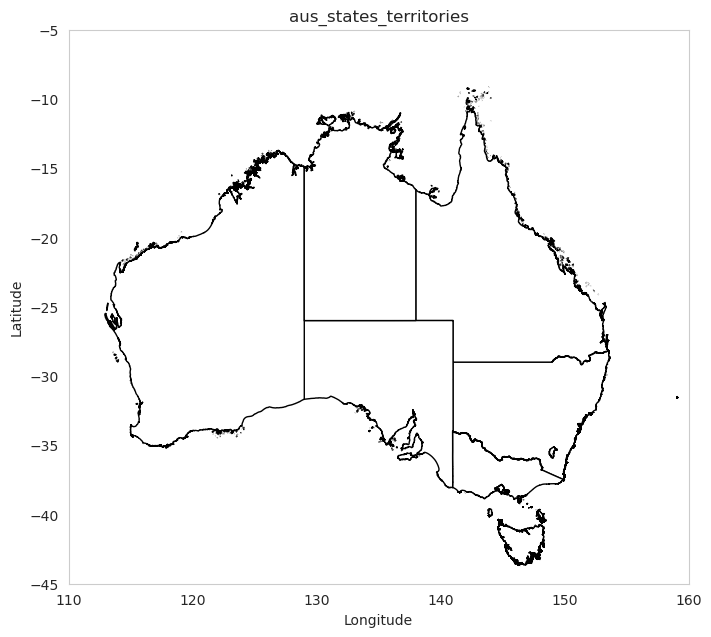

In [10]:
name =  "aus_states_territories"
facecolor = "white" # "lightgrey", "none"
edgecolor = "black" # "white"
figsize = (8,8)
title = name
crs = 'epsg:7844'
area_linewidth = 1
xlim = (110,160)
ylim = (-45, -5)
cmap= None

plot_aus_shapefiles(name = name,
                    facecolor = facecolor, 
                    edgecolor = edgecolor,
                    figsize = figsize,
                    title = None,
                    crs = crs,
                    area_linewidth = area_linewidth,
                    xlim = xlim,
                    ylim = ylim,
                    cmap = cmap);

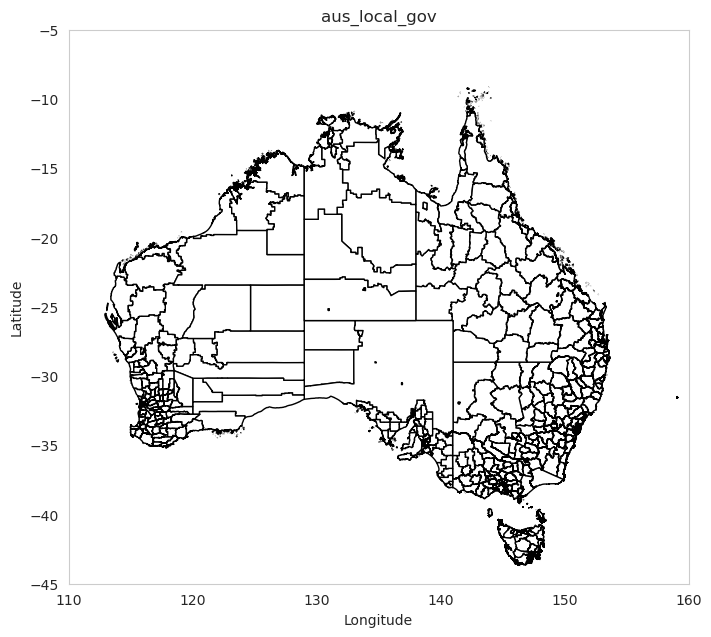

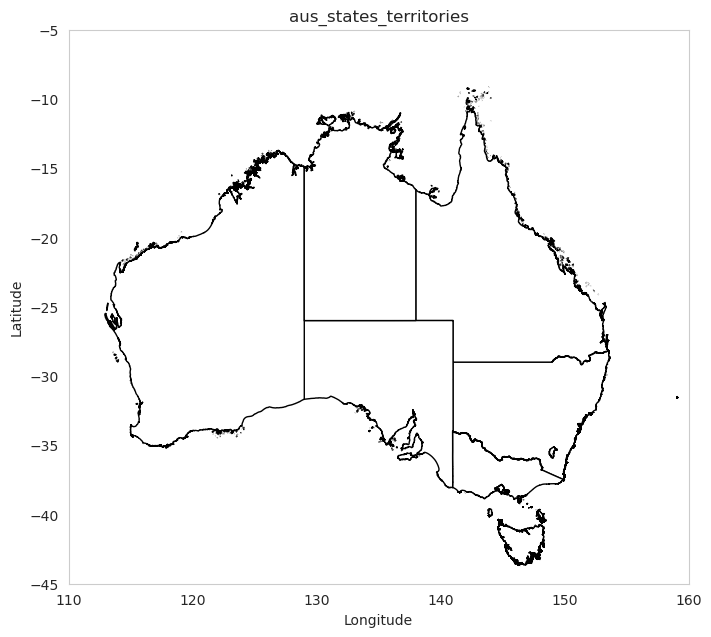

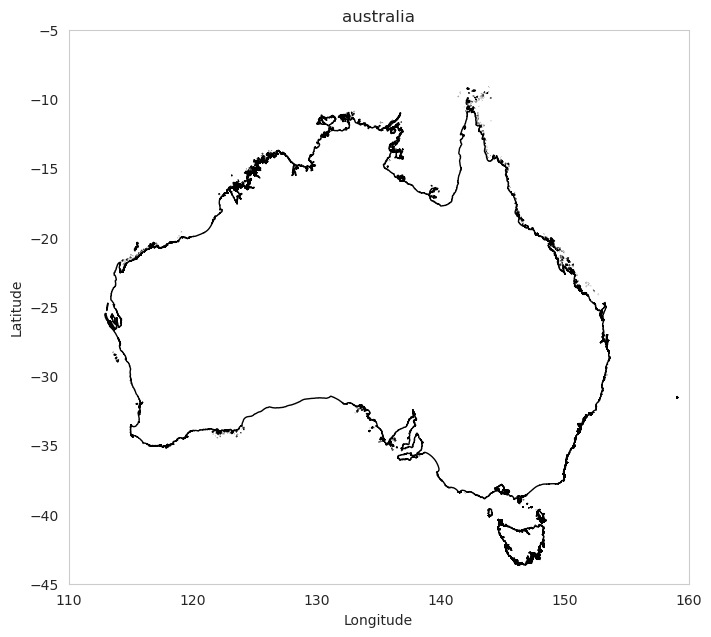

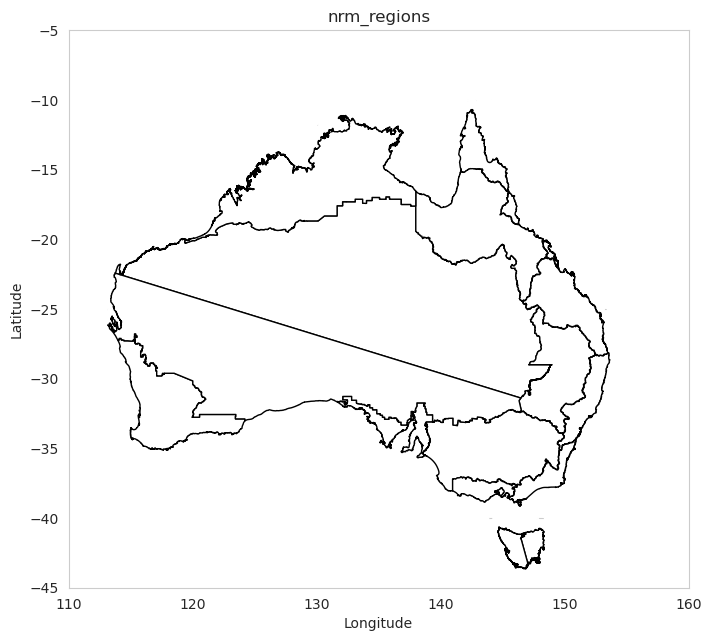

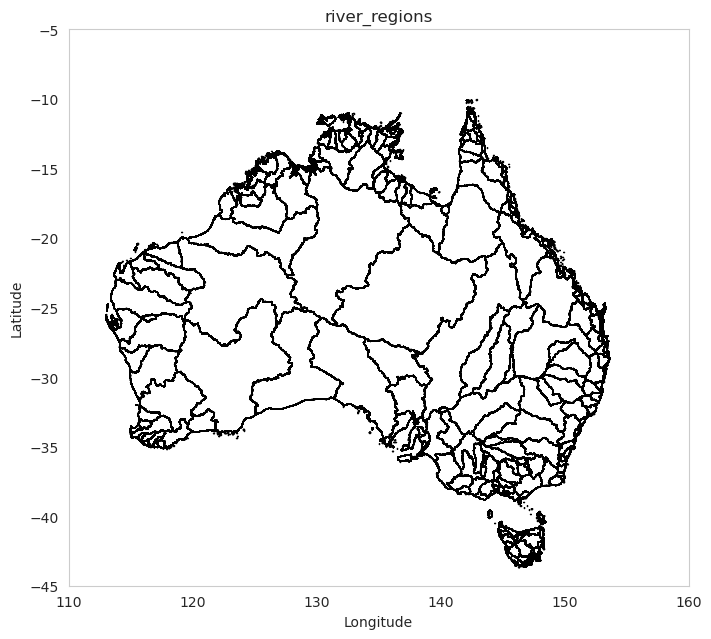

In [11]:
facecolor = "white" # "lightgrey", "none"
edgecolor = "black" # "white"
figsize = (8,8)
title = name
crs = 'epsg:7844'
area_linewidth = 1
xlim = (110,160)
ylim = (-45, -5)

for name in shape_files:
    plot_aus_shapefiles(name = name,
                        facecolor = facecolor, 
                        edgecolor = edgecolor,
                        figsize = figsize,
                        title = None,
                        crs = crs,
                        area_linewidth = area_linewidth,
                        xlim = xlim,
                        ylim = ylim);


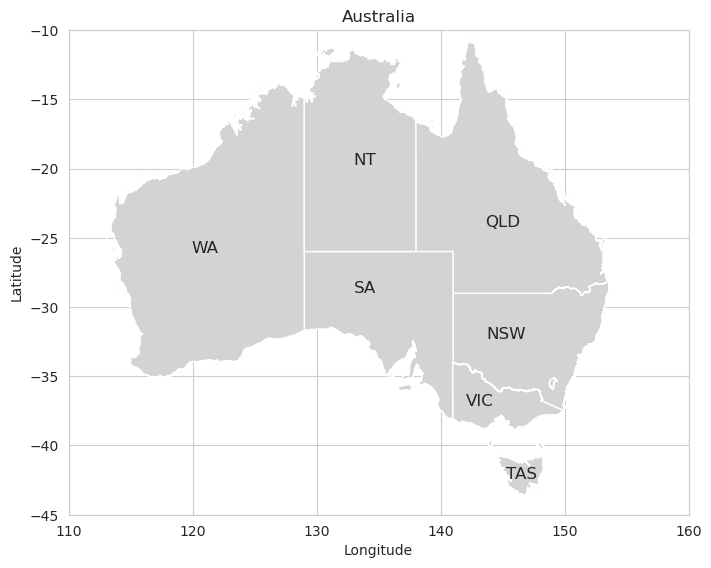

In [12]:
name =  "aus_states_territories"


aus_states_territories = gpd.read_file(f'/g/data/ia39/aus-ref-clim-data-nci/shapefiles/data/{name}/{name}.shp')

# Set up the plot
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(8, 8))


# Add the shapefile of Australia as a background map
aus_states_territories.plot(ax=ax, color='lightgrey', edgecolor='white')

# sns.scatterplot(ax=ax, data=data, x='longs', y='lats', s=100, legend='full')

states = ["WA", "NT", "SA", "QLD", "NSW", "VIC", "TAS"]
lats = [-26.06, -19.7, -29.0, -24.2, -32.3, -37.1, -42.4]
lons = [119.9, 133,  133, 143.6, 143.7, 142.0, 145.3]

for lon, lat, state in zip(lons, lats, states):
    plt.text(lon, lat, state, size=12)

# Set the plot title and axis labels
plt.title('Australia')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.xlim(110,160)
plt.ylim(-45, -10)

# Show the plot
plt.savefig("aus_states.png", )
# plt.savefig("aus_states.svg", )


In [13]:
# Plot Australian map

In [14]:
# Plot Australian map with states

In [15]:
# plot one state

In [16]:
gdf = gpd.read_file(f'/g/data/ia39/aus-ref-clim-data-nci/shapefiles/data/{name}/{name}.shp')
gdf.loc[gdf.STE_NAME21=="Victoria"]

,STE_NAME21,AREASQKM21,LOCI_URI21,geometry
1,Victoria,227496.2479,http://linked.data.gov.au/dataset/asgsed3/STE/2,"MULTIPOLYGON (((146.29286 -39.15778, 146.29341..."


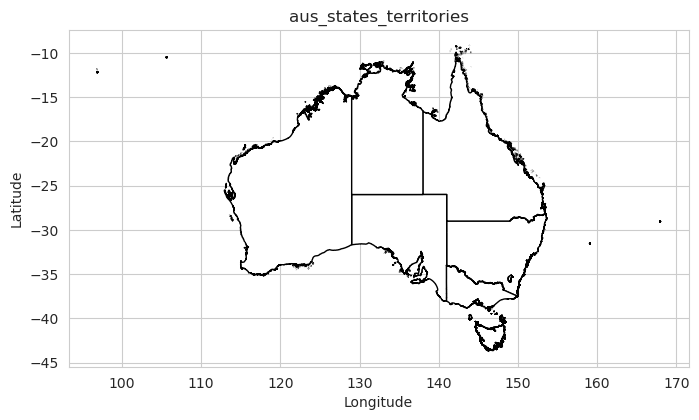

In [17]:
vic = gdf.loc[gdf.STE_NAME21=="Victoria"] 
# Define the CRS of the shapefile manually
gdf.crs = crs

# Set up the plot
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=figsize)

# Add the shapefile of Australia as a background map
gdf.plot(ax=ax,
         facecolor=facecolor,
         edgecolor=edgecolor, 
         linewidth=area_linewidth,
         cmap = cmap,
        )

# Set the plot title and axis labels
if title == None:
    plt.title(name)
else:
    plt.title(title)
plt.xlabel('Longitude')
plt.ylabel('Latitude')


# Show the plot
plt.savefig(f"{name}.png",)

In [18]:
ds = xr.open_dataset("/g/data/lp01/CORDEX-CMIP6/CMIP6/DD/gr1.5/CSIRO/ACCESS-CM2/historical/r4i1p1f1/CCAM-v2203-SN/v1-r1/mon/tas/v20231206/tas_gr1.5_ACCESS-CM2_historical_r4i1p1f1_CSIRO_CCAM-v2203-SN_v1-r1_mon_195101-201412.nc")
ds

<xarray.Dataset>
Dimensions:  (time: 768, lon: 62, lat: 41)
Coordinates:
  * time     (time) datetime64[ns] 1951-01-15T12:00:00 ... 2014-12-15T12:00:00
  * lon      (lon) float64 90.0 91.5 93.0 94.5 96.0 ... 177.0 178.5 180.0 181.5
  * lat      (lat) float64 -51.75 -50.25 -48.75 -47.25 ... 3.75 5.25 6.75 8.25
Data variables:
    tas      (time, lat, lon) float32 ...
Attributes: (12/32)
    CDI:                       Climate Data Interface version 2.2.1 (https://...
    Conventions:               CF-1.10
    source:                    Conformal Cubic Atmospheric Model v2203
    institution:               Commonwealth Scientific and Industrial Researc...
    axiom_version:             0.2.0
    axiom_schema:              CORDEX
    ...                        ...
    tracking_id:               0fba49e2-43d5-4afc-afee-47ff1aee832d
    variable_id:               tas
    doi:                       https://doi.org/10.25914/rd73-4m38
    history:                   Fri Feb 16 21:44:02 2024: cdo -O -s -L -P 28 -...
    CDO:                       Climate Data Operators version 2.2.0 (https://...
    cdo_openmp_thread_number:  28

(-45.0, -5.0)

<Figure size 640x480 with 0 Axes>

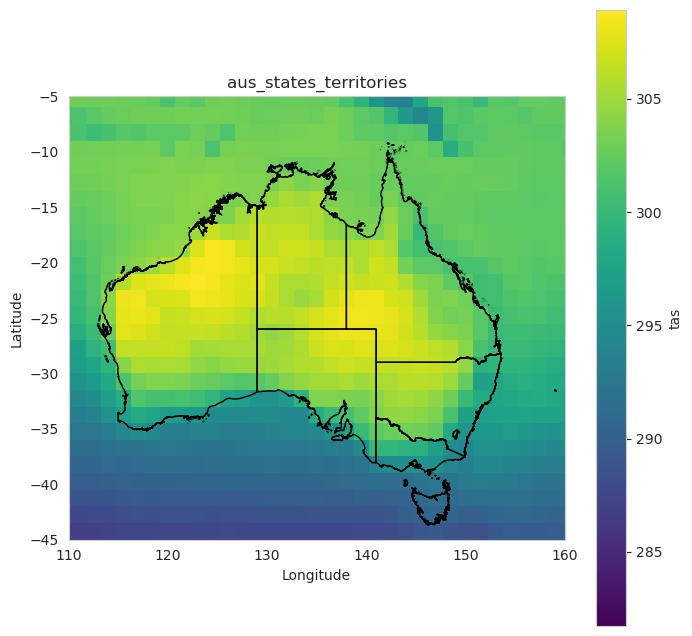

In [19]:
da = ds.tas.max(dim="time")
gdf = gpd.read_file(f'/g/data/ia39/aus-ref-clim-data-nci/shapefiles/data/{name}/{name}.shp')

# Add the shapefile of Australia as a background map
gdf.plot(ax=ax,
         facecolor=facecolor,
         edgecolor=edgecolor, 
         linewidth=area_linewidth,
         cmap = cmap,
        )
# vic = gdf.loc[gdf.STE_NAME21=="Victoria"] 

fig, ax = plt.subplots(figsize=figsize)
da.plot.pcolormesh(x='lon', y='lat', ax=ax)
gdf.plot(ax=ax, edgecolor='black', color='none')

# Set the plot title and axis labels
if title == None:
    plt.title(name)
else:
    plt.title(title)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.xlim(xlim)
plt.ylim(ylim)


In [20]:
import rioxarray


In [21]:
hazard_data_filename = "/g/data/lp01/CORDEX-CMIP6/CMIP6/DD/gr1.5/CSIRO/ACCESS-CM2/historical/r4i1p1f1/CCAM-v2203-SN/v1-r1/mon/tas/v20231206/tas_gr1.5_ACCESS-CM2_historical_r4i1p1f1_CSIRO_CCAM-v2203-SN_v1-r1_mon_195101-201412.nc"
xds = rioxarray.open_rasterio(hazard_data_filename)
xds = xds.rio.write_crs(crs)

# 2D xr.DataArray:
hazard_data = xds.mean(dim="time")

<Axes: title={'center': 'spatial_ref = 0'}, xlabel='longitude [degrees_east]', ylabel='latitude [degrees_north]'>

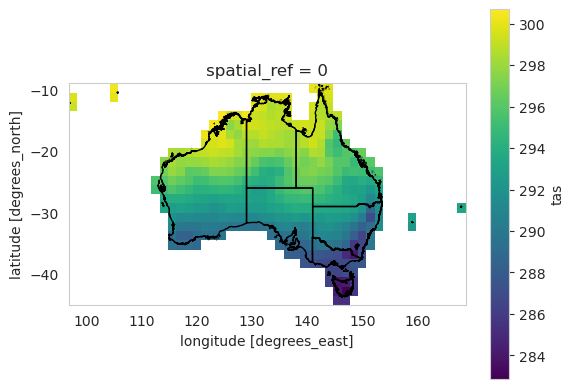

In [22]:
clipped = hazard_data.rio.clip(gdf.geometry.values, gdf.crs, all_touched=True, invert=False) # set invert = True if you want to plot data outside the shape
clipped.plot()
gdf.plot(ax=plt.gca(), edgecolor='black', color='none')

In [23]:
clipped_invert = xds.mean(dim="time").rio.clip(gdf.geometry.values, gdf.crs, all_touched = False, invert=True)

<Axes: title={'center': 'spatial_ref = 0'}, xlabel='longitude [degrees_east]', ylabel='latitude [degrees_north]'>

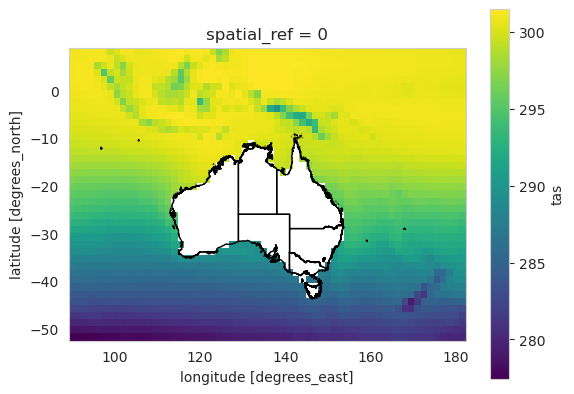

In [24]:
clipped_invert.plot()
gdf.plot(ax=plt.gca(), edgecolor='black', color='none')

(-45.0, -5.0)

<Figure size 640x480 with 0 Axes>

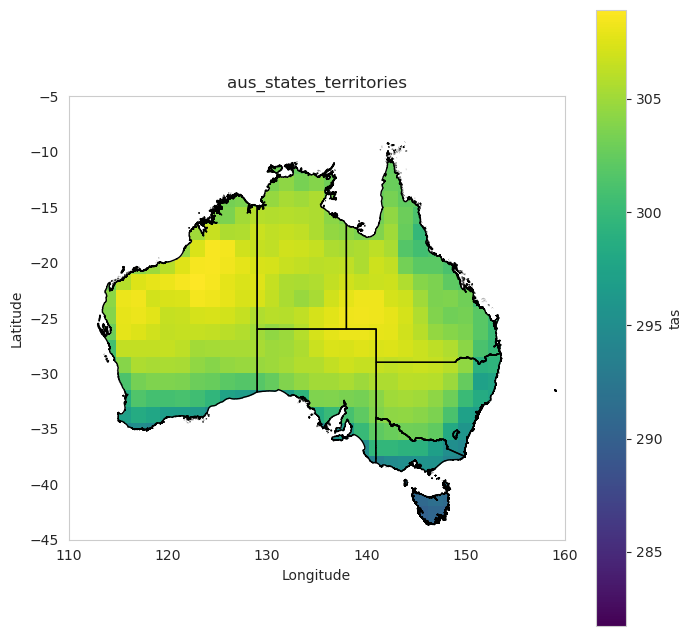

In [25]:
da = ds.tas.max(dim="time")
name = "aus_states_territories" 
gdf = gpd.read_file(f'/g/data/ia39/aus-ref-clim-data-nci/shapefiles/data/{name}/{name}.shp')

# Add the shapefile of Australia as a background map
gdf.plot(ax=ax,
         facecolor=facecolor,
         edgecolor=edgecolor, 
         linewidth=area_linewidth,
         cmap = cmap,
        )

fig, ax = plt.subplots(figsize=figsize)

# plot the hazard data
da.plot.pcolormesh(x='lon', y='lat', ax=ax)
# outside the shape, fill white
not_australia.plot(ax=ax, facecolor="white", linewidth=0)
# plot the shape edges, eg state borders
gdf.plot(ax=ax, edgecolor='black', color='none')

# Set the plot title and axis labels
if title == None:
    plt.title(name)
else:
    plt.title(title)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.xlim(xlim)
plt.ylim(ylim)



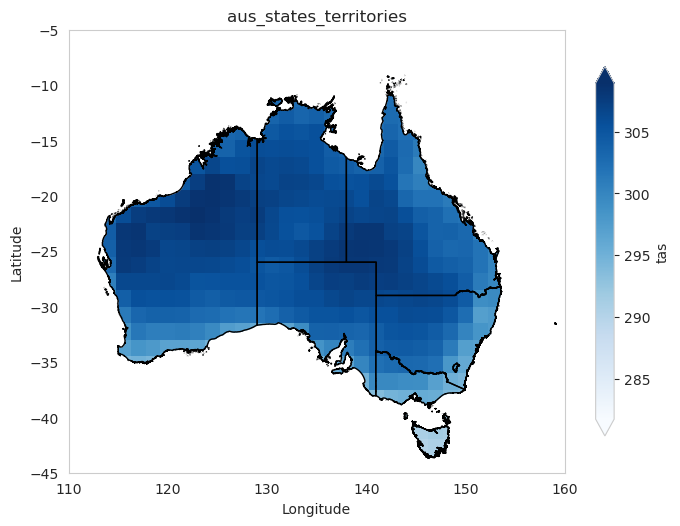

In [26]:
facecolor = "white" # "lightgrey", "none"
edgecolor = "black" # "white"
figsize = (8,8)
title = name
crs = 'epsg:7844'
area_linewidth = 1
xlim = (110,160)
ylim = (-45, -5)
data = ds.tas.max(dim="time")
cmap = "Blues"
varname = "tas"
cbar_extent="both"


plot_aus_shapefiles(name = name,
                    data = data,
                    facecolor = facecolor, 
                    edgecolor = edgecolor,
                    figsize = figsize,
                    title = None,
                    crs = crs,
                    area_linewidth = area_linewidth,
                    xlim = xlim,
                    ylim = ylim,
                    cmap = cmap,
                    cbar_extent = cbar_extent,
                    varname = varname,
                    );


(-40.1591764702752, -32.98063640290455)

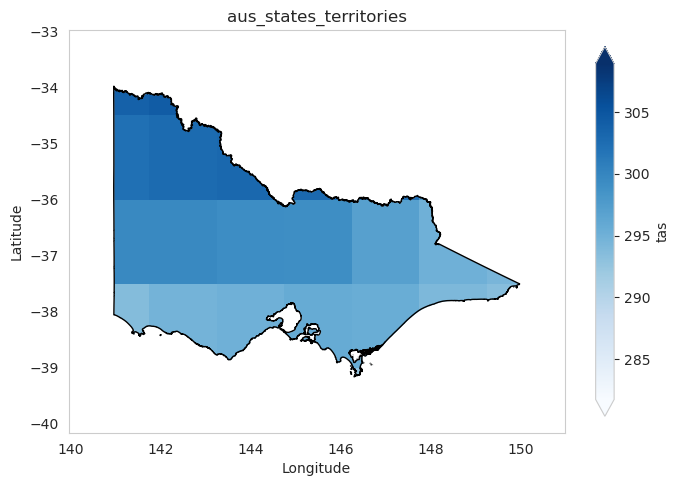

In [27]:

name = "aus_states_territories" 
gdf = gpd.read_file(f'/g/data/ia39/aus-ref-clim-data-nci/shapefiles/data/{name}/{name}.shp')

# Define the CRS of the shapefile manually
gdf.crs = crs

# selct state
vic = gdf.loc[gdf.STE_NAME21=="Victoria"] 


# map_total_bounds = [xlim[0], ylim[0], xlim[1], ylim[1]]
map_total_bounds = vic.total_bounds

not_vic = gpd.GeoSeries(data = [box(*box(*map_total_bounds).buffer(1.0).bounds).difference(vic["geometry"].values[0])],
                              crs=crs,)

minx, miny, maxx, maxy = not_vic.total_bounds

try:
    gdf = gpd.read_file(f'/g/data/ia39/aus-ref-clim-data-nci/shapefiles/data/{name}/{name}.shp')
except:
    print(f"Could not read /g/data/ia39/aus-ref-clim-data-nci/shapefiles/data/{name}/{name}.shp")
    
# Define the CRS of the shapefile manually
gdf.crs = crs

# Set up the plot
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=figsize)

if data is not None:
    # plot the hazard data
    plt.pcolormesh(data.lon, data.lat, data, cmap = cmap,)
    cbar = plt.colorbar( shrink = 0.6, extend = cbar_extent)
    cbar.ax.set_ylabel(varname)
    
    facecolor = "none"

# outside the shape, fill white
not_vic.plot(ax=ax, facecolor="white", linewidth=0)
# plot the shape edges, eg state borders


vic.plot(ax=ax,
         facecolor=facecolor,
         edgecolor=edgecolor, 
         linewidth=area_linewidth,
        )

# Set the plot title and axis labels
if title is None:
    plt.title(name)
else:
    plt.title(title)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.xlim(minx, maxx)
plt.ylim(miny, maxy)

# Show the plot
# plt.savefig(f"{name}.png",)


(-40.1591764702752, -32.98063640290455)

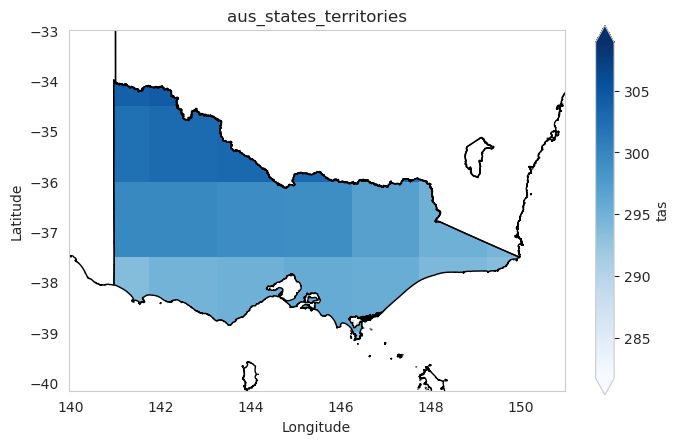

In [28]:
name = "aus_states_territories" 
gdf = gpd.read_file(f'/g/data/ia39/aus-ref-clim-data-nci/shapefiles/data/{name}/{name}.shp')

# Define the CRS of the shapefile manually
gdf.crs = crs

# selct state
vic = gdf.loc[gdf.STE_NAME21=="Victoria"] 


# map_total_bounds = [xlim[0], ylim[0], xlim[1], ylim[1]]
map_total_bounds = vic.total_bounds

not_vic = gpd.GeoSeries(data = [box(*box(*map_total_bounds).buffer(1.0).bounds).difference(vic["geometry"].values[0])],
                              crs=crs,)

minx, miny, maxx, maxy = not_vic.total_bounds

try:
    gdf = gpd.read_file(f'/g/data/ia39/aus-ref-clim-data-nci/shapefiles/data/{name}/{name}.shp')
except:
    print(f"Could not read /g/data/ia39/aus-ref-clim-data-nci/shapefiles/data/{name}/{name}.shp")
    
# Define the CRS of the shapefile manually
gdf.crs = crs

# Set up the plot
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=figsize)

if data is not None:
    # plot the hazard data
    plt.pcolormesh(data.lon, data.lat, data, cmap = cmap,)
    cbar = plt.colorbar( shrink = 0.6, extend = cbar_extent)
    cbar.ax.set_ylabel(varname)
    
    facecolor = "none"

# outside the shape, fill white
not_vic.plot(ax=ax, facecolor="white", linewidth=0)
# plot the shape edges, eg state borders


gdf.plot(ax=ax,
         facecolor=facecolor,
         edgecolor=edgecolor, 
         linewidth=area_linewidth,
        )

# Set the plot title and axis labels
if title is None:
    plt.title(name)
else:
    plt.title(title)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.xlim(minx, maxx)
plt.ylim(miny, maxy)

# Show the plot
# plt.savefig(f"{name}.png",)